<a href="https://colab.research.google.com/github/saritmaitra/Natural-Gas-spot-price-prediction/blob/master/natural_gas_spot_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from datetime import datetime
import math
import scipy as sp
import sklearn
from sklearn.neural_network import MLPRegressor

In [0]:
pip install bokeh

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Natural_Gas_Spot_Price .xlsx to Natural_Gas_Spot_Price .xlsx


In [0]:
df = pd.read_excel('Natural_Gas_Spot_Price .xlsx')
df.head(10)

,Day,Henry Hub Natural Gas Spot Price Dollars per Million Btu
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
5,1997-01-14,4.01
6,1997-01-15,4.34
7,1997-01-16,4.71
8,1997-01-17,3.91
9,1997-01-20,3.26


In [0]:
# Rename columns 
df= df.rename(
    columns={
        "Henry Hub Natural Gas Spot Price Dollars per Million Btu": "gas price",
        "Day": "date"
    }
)
df.head()

,date,gas price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [0]:
df = df.set_index('date')
df = df.sort_index()
df.head()

,gas price
date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [0]:
df.isnull().sum()

gas price    1
dtype: int64

In [0]:
df = df.fillna(method ='pad') # filling the missing values with previous ones 
df.isnull().sum()

gas price    0
dtype: int64

In [0]:
df.head()

,gas price
date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [0]:
df.index

DatetimeIndex(['1997-01-07', '1997-01-08', '1997-01-09', '1997-01-10',
               '1997-01-13', '1997-01-14', '1997-01-15', '1997-01-16',
               '1997-01-17', '1997-01-20',
               ...
               '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-21'],
              dtype='datetime64[ns]', name='date', length=5732, freq=None)

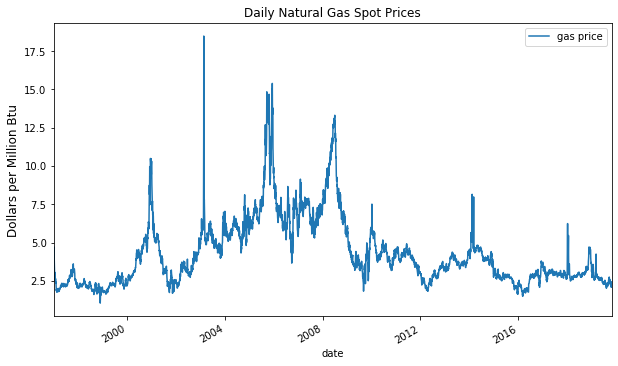

In [0]:
df.plot(figsize=(10, 6))
plt.title('Daily Natural Gas Spot Prices', fontsize=12)
plt.ylabel('Dollars per Million Btu', fontsize=12)
plt.show()

In [0]:
df.describe()

,gas price
count,5732.000000
mean,4.269532
std,2.187236
min,1.050000
25%,2.740000
50%,3.620000
75%,5.332500
max,18.480000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5732 entries, 1997-01-07 to 2019-10-21
Data columns (total 1 columns):
gas price    5732 non-null float64
dtypes: float64(1)
memory usage: 89.6 KB


### Splitting Data into a Training set and a Test set

In [0]:
train_data = df['1997-01-07':'2018-12-31']
test_data  = df['2019-01-01':]
print('Observations: %d' % (len(df)))
print('Train Dataset:',train_data.shape)
print('Test Dataset:', test_data.shape)

Observations: 5732
Train Dataset: (5530, 1)
Test Dataset: (202, 1)


In [0]:
train_data.isnull().sum()

gas price    0
dtype: int64

<Figure size 720x432 with 0 Axes>

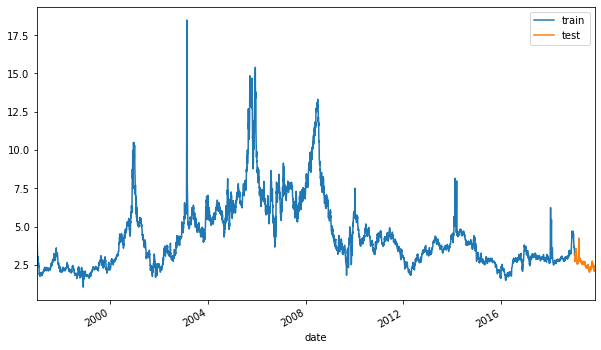

In [0]:
plt.figure(figsize=(10, 6))
ax = train_data.plot(figsize=(10, 6))
test_data.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data_scaled = scaler.fit_transform(train_data)
print(train_data_scaled)

[[0.1589214 ]
 [0.15777395]
 [0.14687321]
 ...
 [0.13597246]
 [0.11761331]
 [0.12621916]]


In [0]:
# creating a data structure with 60 time steps and 1 output.
X_train = []
y_train = []

for i in range(60, len(train_data_scaled)):
  X_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
test_data_scaled = scaler.fit_transform(test_data)
print(test_data_scaled)

[[0.55156951]
 [0.31390135]
 [0.34977578]
 [0.32286996]
 [0.39013453]
 [0.40358744]
 [0.41704036]
 [0.41704036]
 [0.60089686]
 [0.68161435]
 [0.69955157]
 [0.69955157]
 [0.632287  ]
 [0.632287  ]
 [0.49775785]
 [0.49775785]
 [0.47085202]
 [0.46188341]
 [0.41255605]
 [0.43946188]
 [0.35874439]
 [0.30493274]
 [0.24663677]
 [0.23318386]
 [0.25112108]
 [0.2690583 ]
 [0.28699552]
 [0.33183857]
 [0.30941704]
 [0.26457399]
 [0.26457399]
 [0.25560538]
 [0.30044843]
 [0.30044843]
 [0.31838565]
 [0.32286996]
 [0.367713  ]
 [0.32286996]
 [0.39013453]
 [0.39013453]
 [0.52466368]
 [1.        ]
 [0.52017937]
 [0.52017937]
 [0.39461883]
 [0.39461883]
 [0.37668161]
 [0.3632287 ]
 [0.38116592]
 [0.41704036]
 [0.41704036]
 [0.39461883]
 [0.40358744]
 [0.37668161]
 [0.37668161]
 [0.32735426]
 [0.31390135]
 [0.32286996]
 [0.30044843]
 [0.30044843]
 [0.31838565]
 [0.31838565]
 [0.33183857]
 [0.32286996]
 [0.28699552]
 [0.2690583 ]
 [0.31390135]
 [0.30941704]
 [0.31390135]
 [0.31390135]
 [0.32735426]
 [0.32

### Normalizing the Data

In [0]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
#scaler = MinMaxScaler()

# reshape input to be 3D [samples, timesteps, features]
#X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
#X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [0]:
#creating data structure with 60 time steps and 1 output
X_train = []
y_train = []

for i in range(60, len(train_data_scaled)):
  X_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train)

[[0.1589214  0.15777395 0.14687321 ... 0.04532415 0.05163511 0.04589788]
 [0.15777395 0.14687321 0.16465863 ... 0.05163511 0.04589788 0.04704532]
 [0.14687321 0.16465863 0.16924842 ... 0.04589788 0.04704532 0.04934022]
 ...
 [0.11474469 0.1124498  0.11933448 ... 0.14859438 0.15203672 0.15203672]
 [0.1124498  0.11933448 0.1199082  ... 0.15203672 0.15203672 0.13597246]
 [0.11933448 0.1199082  0.12679289 ... 0.15203672 0.13597246 0.11761331]]


In [0]:
print(y_train)

[0.04704532 0.04934022 0.05393001 ... 0.13597246 0.11761331 0.12621916]


In [0]:
# reshaping
# 3D tensor with shape (batch_size, timesteps, input_dim).

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(5470, 60, 1)


In [0]:
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
#from keras.layers import Dense, Dropout, LSTM
#from keras.models import Sequential
#from keras.optimizers import SGD 
#from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
#import itertools


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
#Build the model

# initializing RNN
model = tf.keras.Sequential()

# adding 1st LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

# adding 2nd LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

# adding 3rd LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

# adding 4th LSTM layer and some dropout regularization
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))

# adding output layer
model.add(tf.keras.layers.Dense(units=1))

#compiling RNN
model.compile(loss='mean_squared_error', optimizer='adam')

early_stopping = EarlyStopping(monitor='loss', patience=10)

# fitting RNN on training set
model.fit(X_train, y_train, epochs= 100, batch_size=32, verbose=2, callbacks=[early_stopping])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5470 samples
Epoch 1/100
5470/5470 - 69s - loss: 0.0035
Epoch 2/100
5470/5470 - 62s - loss: 0.0017
Epoch 3/100
5470/5470 - 63s - loss: 0.0014
Epoch 4/100
5470/5470 - 61s - loss: 0.0012
Epoch 5/100
5470/5470 - 61s - loss: 0.0011
Epoch 6/100
5470/5470 - 61s - loss: 0.0012
Epoch 7/100
5470/5470 - 61s - loss: 0.0010
Epoch 8/100
5470/5470 - 61s - loss: 9.8684e-04
Epoch 9/100
5470/5470 - 62s - loss: 9.7194e-04
Epoch 10/100
5470/5470 - 61s - loss: 8.9248e-04
Epoch 11/100
5470/5470 - 63s - loss: 7.9995e-04
Epoch 12/100
5470/5470 - 61s - loss: 8.7190e-04
Epoch 13/100
5470/5470 - 63s - loss: 8.2699e-04
Epoch 14/100
5470/5470 - 61s - loss: 8.0140e-04
Epoch 15/100
5470/5470 - 62s - loss: 7.6211e-04
Epoch 16/100
5470/5470 - 61s - loss: 7.5906e-04
Epoch 17/100
5470/5470 - 61s - loss: 7.2197e-04
Epoch 18/100
5470/5470 -

In [0]:
test_data_scaled = scaler.fit_transform(test_data)
print(test_data_scaled)

[[0.55156951]
 [0.31390135]
 [0.34977578]
 [0.32286996]
 [0.39013453]
 [0.40358744]
 [0.41704036]
 [0.41704036]
 [0.60089686]
 [0.68161435]
 [0.69955157]
 [0.69955157]
 [0.632287  ]
 [0.632287  ]
 [0.49775785]
 [0.49775785]
 [0.47085202]
 [0.46188341]
 [0.41255605]
 [0.43946188]
 [0.35874439]
 [0.30493274]
 [0.24663677]
 [0.23318386]
 [0.25112108]
 [0.2690583 ]
 [0.28699552]
 [0.33183857]
 [0.30941704]
 [0.26457399]
 [0.26457399]
 [0.25560538]
 [0.30044843]
 [0.30044843]
 [0.31838565]
 [0.32286996]
 [0.367713  ]
 [0.32286996]
 [0.39013453]
 [0.39013453]
 [0.52466368]
 [1.        ]
 [0.52017937]
 [0.52017937]
 [0.39461883]
 [0.39461883]
 [0.37668161]
 [0.3632287 ]
 [0.38116592]
 [0.41704036]
 [0.41704036]
 [0.39461883]
 [0.40358744]
 [0.37668161]
 [0.37668161]
 [0.32735426]
 [0.31390135]
 [0.32286996]
 [0.30044843]
 [0.30044843]
 [0.31838565]
 [0.31838565]
 [0.33183857]
 [0.32286996]
 [0.28699552]
 [0.2690583 ]
 [0.31390135]
 [0.30941704]
 [0.31390135]
 [0.31390135]
 [0.32735426]
 [0.32

In [0]:
dataset_total = pd.concat((train_data, test_data), axis=0)

In [0]:
# getting the predited natuaral gas price of 2019

inputs = dataset_total[len(dataset_total) - len(test_data)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
y_test = []

for i in range (60, 200):
  X_test.append(inputs[i-60:i, 0])
  y_test.append(test_data_scaled[i,0])
  
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [0]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.32 RMSE


In [0]:
def rmsle(testPredict, testY) :
  error = np.square(np.log10(testPredict +1) - np.log10(testY +1)).mean() ** 0.5
  Acc = 1 - error
  return Acc

print("Accuracy attained on Training Set = ",rmsle(trainPredict, trainY))
print("Accuracy attained on Test Set = ", rmsle(testPredict,testY))

Accuracy attained on Training Set =  0.9541387174058177
Accuracy attained on Test Set =  0.9557776351133617


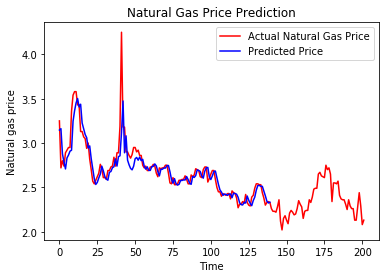

In [0]:
plt.plot(test_data.values, color = 'red', label ="Actual Natural Gas Price")
plt.plot(testPredict, color='blue', label = 'Predicted Price')
plt.title("Natural Gas Price Prediction")
plt.xlabel('Time')
plt.ylabel('Natural gas price')
plt.legend(loc='best')
plt.show()

In [0]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(testPredict)),2)))
rms

2.5054728955672054

## I have tried XGBoost with same set-up as below:

In [0]:
from xgboost import XGBRegressor 

In [0]:
dataset_total = pd.concat((train_data, test_data), axis=0)

inputs = dataset_total[len(dataset_total) - len(test_data)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
y_test = []

for i in range (60, 200):
  X_test.append(inputs[i-60:i, 0])
  y_test.append(test_data_scaled[i,0])
  
X_test, y_test = np.array(X_test), np.array(y_test)

In [0]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
train_pred = xg_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print("RMSE_train: %f" % (rmse))

test_pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("RMSE_test: %f" % (rmse))

RMSE_train: 0.118546
RMSE_test: 0.203718


In [0]:
train_pred= train_pred.reshape(-1, 1)
test_pred= test_pred.reshape(-1, 1)

In [0]:
# invert predictions
train_pred = scaler.inverse_transform(train_pred)
trainY = scaler.inverse_transform([y_train])
test_pred = scaler.inverse_transform(test_pred)
testY = scaler.inverse_transform([y_test])

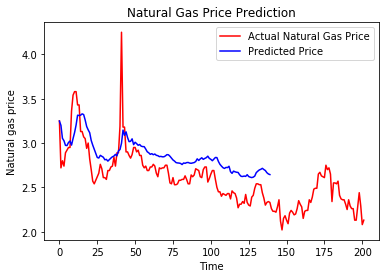

In [0]:
plt.plot(test_data.values, color = 'red', label ="Actual Natural Gas Price")
plt.plot(test_pred, color='blue', label = 'Predicted Price')
plt.title("Natural Gas Price Prediction")
plt.xlabel('Time')
plt.ylabel('Natural gas price')
plt.legend(loc='best')
plt.show()